#Домашнее задание № 12

#Feature Selection

1. Генерация данных

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
from sklearn.datasets import make_classification

# зафиксируем случайное значение
x_data_generated, y_data_generated = make_classification(scale=1,
                                                         random_state=13
                                                        )

In [83]:
# посмотрим, что мы имеем
x_data_generated

array([[-0.75619018,  0.21395857, -0.82867609, ...,  0.53451903,
         1.71244753, -0.96185641],
       [ 1.73869086, -0.16574873, -1.05609496, ...,  0.64513215,
         0.13010028, -0.95982956],
       [ 0.48382884, -0.19163168,  1.57107624, ...,  1.33913158,
         1.27512584, -1.31453582],
       ...,
       [ 0.66950843, -1.51960178, -1.30826663, ..., -0.27674249,
         0.98981126,  2.87143611],
       [ 0.55146917, -1.08810532, -0.17640169, ..., -0.18344132,
        -1.02655964,  1.31005256],
       [ 0.45043866, -0.14014651, -1.8189506 , ..., -1.27436948,
        -0.03835527,  0.64253573]])

In [84]:
x_data_generated.shape

(100, 20)

In [85]:
y_data_generated

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [86]:
y_data_generated.shape

(100,)

2. Построим модель логистической регрессии и оценим среднюю точность.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(LogisticRegression(),   # выбронная модель для оценки
                x_data_generated,
                y_data_generated,
                scoring='accuracy'      # метод возвращает список оценок точности классификации
                                        # для каждой итерации кросс-валидации
               ).mean()

0.89

3. Используем статистические методы для отбора признаков

а) Признаки на основе матрицы корреляции

объединю все данные в уже привычный мне df

In [89]:
X_tmp = pd.DataFrame(x_data_generated)
X_tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.756190,0.213959,-0.828676,-1.528017,-2.104497,0.632824,0.301350,-0.882576,-0.306198,2.465294,-1.656867,0.312963,-1.052908,-1.235778,1.855338,-0.814566,-0.766852,0.534519,1.712448,-0.961856
1,1.738691,-0.165749,-1.056095,-0.137139,-0.654046,0.348853,1.963982,0.833162,1.740636,-1.082962,-1.803864,0.963135,2.556159,-1.316542,2.109290,-0.516526,-0.666496,0.645132,0.130100,-0.959830
2,0.483829,-0.191632,1.571076,-0.579508,1.436571,-1.074081,1.762714,-0.159563,0.148698,0.531977,-0.488979,-0.005137,-1.370364,1.446023,-0.506516,-0.162401,0.460995,1.339132,1.275126,-1.314536
3,1.849776,0.861722,0.365227,0.247661,0.135947,-0.394436,1.336323,-0.199560,0.305607,0.506357,0.894182,-1.649669,0.016462,0.397888,-0.953691,2.503354,-0.570866,0.838073,-0.393036,0.565642
4,1.377108,-0.893788,1.351264,1.393747,0.148176,0.380857,-0.407761,1.476685,-0.562467,-1.800564,-0.698816,0.266751,-0.909360,-1.175715,-0.204859,0.167022,-0.897399,0.467582,-1.022961,-1.371149


In [90]:
X_tmp.shape

(100, 20)

In [91]:
y_tmp = pd.DataFrame(y_data_generated)
y_tmp.head()

,0
0,0
1,0
2,0
3,1
4,0


In [92]:
y_tmp.shape

(100, 1)

объединю все это в уже привычный мне df

In [93]:
# переименую колонку
y_tmp.columns = ['target']
y_tmp.head()

,target
0,0
1,0
2,0
3,1
4,0


In [94]:
df = pd.concat([X_tmp, y_tmp], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.756190,0.213959,-0.828676,-1.528017,-2.104497,0.632824,0.301350,-0.882576,-0.306198,2.465294,...,0.312963,-1.052908,-1.235778,1.855338,-0.814566,-0.766852,0.534519,1.712448,-0.961856,0
1,1.738691,-0.165749,-1.056095,-0.137139,-0.654046,0.348853,1.963982,0.833162,1.740636,-1.082962,...,0.963135,2.556159,-1.316542,2.109290,-0.516526,-0.666496,0.645132,0.130100,-0.959830,0
2,0.483829,-0.191632,1.571076,-0.579508,1.436571,-1.074081,1.762714,-0.159563,0.148698,0.531977,...,-0.005137,-1.370364,1.446023,-0.506516,-0.162401,0.460995,1.339132,1.275126,-1.314536,0
3,1.849776,0.861722,0.365227,0.247661,0.135947,-0.394436,1.336323,-0.199560,0.305607,0.506357,...,-1.649669,0.016462,0.397888,-0.953691,2.503354,-0.570866,0.838073,-0.393036,0.565642,1
4,1.377108,-0.893788,1.351264,1.393747,0.148176,0.380857,-0.407761,1.476685,-0.562467,-1.800564,...,0.266751,-0.909360,-1.175715,-0.204859,0.167022,-0.897399,0.467582,-1.022961,-1.371149,0


In [95]:
df.shape

(100, 21)

3. Используем статистические методы для отбора признаков

a) Выбор признаков на основе матрицы корреляции

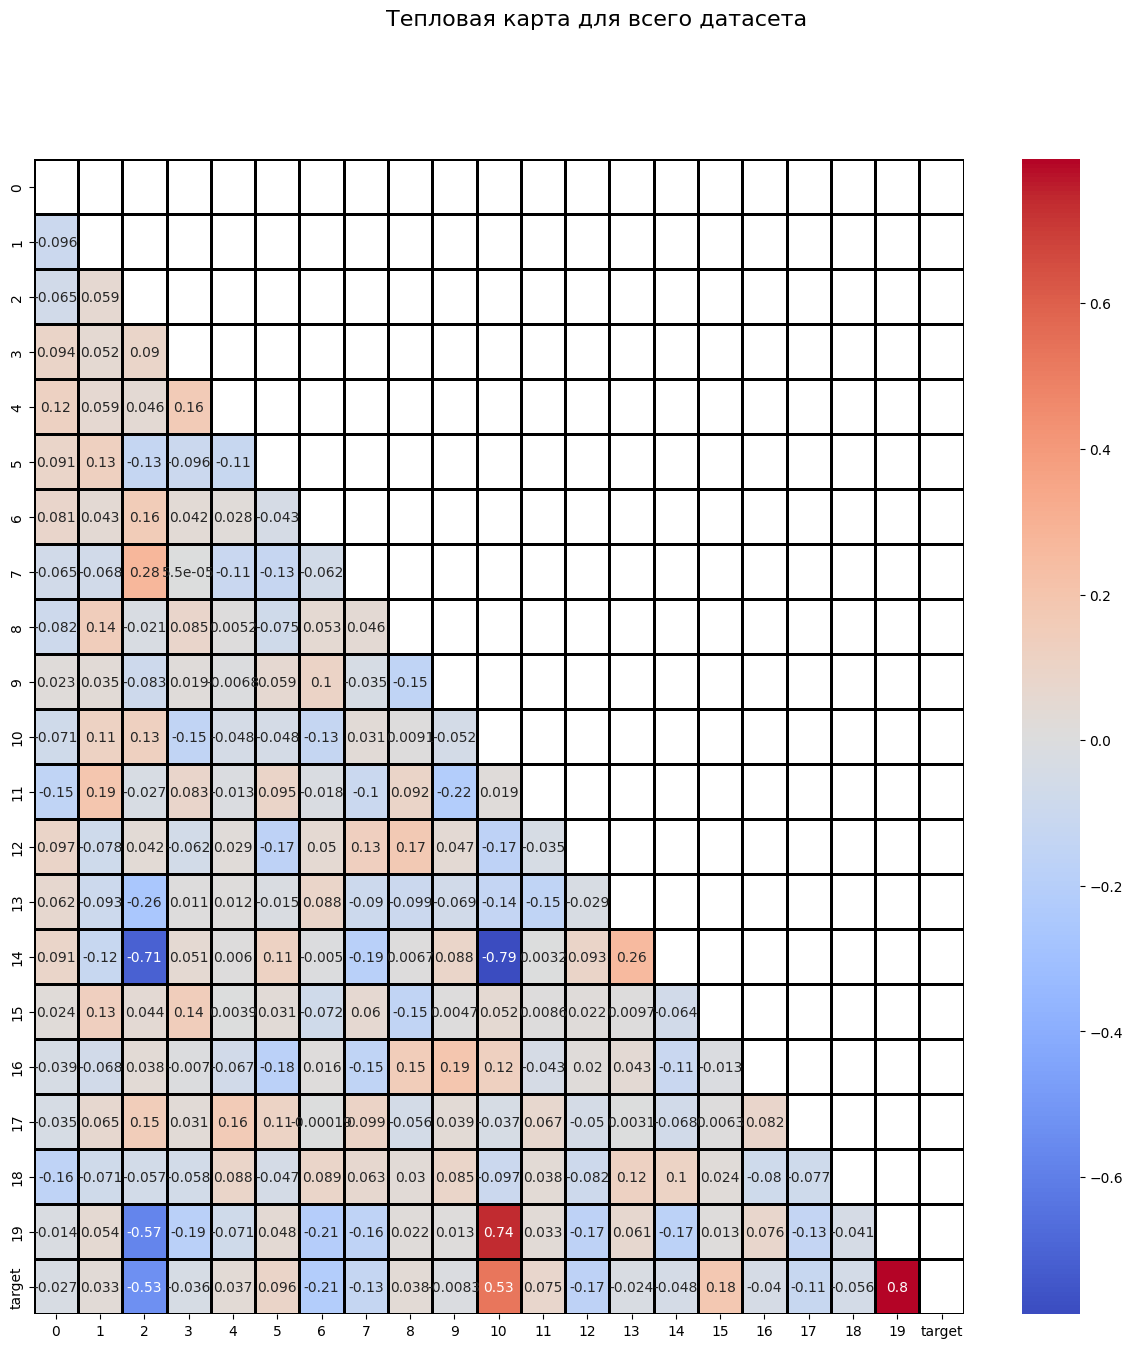

In [106]:
matrix = np.triu(df.corr())     # для построение карты треугольной форма

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),          # построение корреляции
            annot=True,         # нахождение коэффициенто корреляции
            fmt='.2g',          # не более 2-х знаков после запятой
            cmap='coolwarm',    # настройка цвета
            linewidths=1,       # толщина линий
            linecolor='black',  # цвет линий
            mask=matrix         # треуголиник основанием вниз
            )

plt.suptitle('Тепловая карта для всего датасета', fontsize=16)
plt.show()

<Axes: >

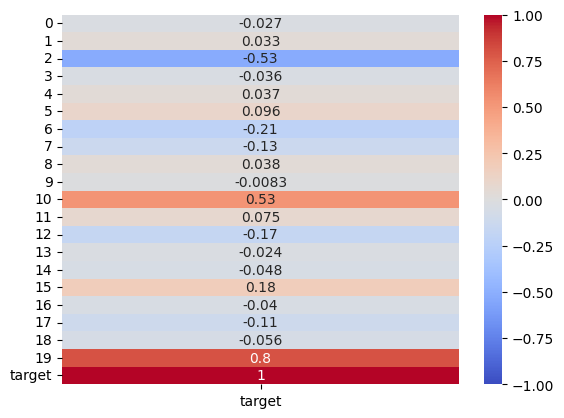

In [107]:
upp_mat = np.triu(df.corr())

sns.heatmap(df.corr()[['target']], vmin=-1, vmax=+1, annot=True, cmap='coolwarm')